In [1]:
"""
Exercise 1
a.  What are the values for TP, TN, FP, FN?
b.  Now calculate the accuracy, precision and recall.
c.  Calculate the F1 and F1.5 measures.
d.  What is the TPR and FPR? Compare with your recall. What do you find?
    Write functions in Python that can calculate the above metrics from a confusion matrix. Note: this is not possible with existing functions from sklearn.metrics, because they work on the raw data and not on an already existing confusion matrix.
e.  From the above table, make a (confusion) matrix in Python.
f.  Write a separate function in Python for each metric and check your solution. Hint: look at the Python function np.diag.
"""

#a.
#TP: 100
#TN: 50
#FP: 10
#FN: 5

#b.
#Accuracy = (100 + 50) / 165 = 150 / 165 (TP + TN / total)
#Precision (YES) = 100/110 ; precision(NO) = 50/55 (TP (or TN) / total predicted yes (or no))
#Recall (YES) = 100/105 ; recall (NO) = 50/60 (TP (or TN) / total actual yes (or no))

#c.
#F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# = (2 * 100/110 * 100/105) / (100/110 * 100/105) for yes

#d.
#TPR = TP/(TP + FN)
#FPR = FP/(FP+TN)

#TPR = 100/(100 + 10) --> is the same as recall
#FPR = 10/(10+50)

def showMetrics(TP, FN, FP, TN):

    def Accuracy(TP, TN, FP, FN):
        total = TP + TN + FP + FN
        accuracy = (TP + TN) / total
        return accuracy

    def PrecisionPOS(TP, FP):
        precisionPos = TP / (TP + FP)
        return precisionPos


    def PrecisionNEG(TN, FN):
        precisionNeg = TN / (TN + FN)
        return precisionNeg

    def RecallPOS(TP, FN):
        recallPos = TP / (TP + FN)
        return recallPos

    def RecallNEG(TN, FP):
        recallNeg = TN / (TN + FP)
        return recallNeg

    def Fmeasure(precision, recall):
        fmeasureValue = (2 * precision * recall) / (precision + recall)
        return fmeasureValue

    def TPR(TP, FN):
        tprValue = TP / (TP + FN)
        return tprValue

    def FPR(FP, TN):
        fprValue = FP / (FP + TN)
        return fprValue

    print("Show Metrics:")

    print("Accuracy: " + str(Accuracy(TP, TN, FP, FN)))

    print("PositiveMetrics")
    print("Precision Pos.: " + str(PrecisionPOS(TP, FP)))
    print("Recall Pos.: " + str(RecallPOS(TP, FN)))
    print("Fmeasure Pos.: " + str(Fmeasure(PrecisionPOS(TP, FP), RecallPOS(TP, FN))))

    print("NegativeMetrics")
    print("Precision Neg.: " + str(PrecisionNEG(TN, FN)))
    print("Recall Neg.: " + str(RecallNEG(TN, FP)))
    print("Fmeasure Neg.: " + str(Fmeasure(PrecisionNEG(TN, FN), RecallNEG(TN, FP))))

    print("True positive rate: " + str(TPR(TP, FN)))
    print("False positive rate: " + str(FPR(FP, FN)))


showMetrics(100, 5, 10, 50)




Show Metrics:
Accuracy: 0.9090909090909091
PositiveMetrics
Precision Pos.: 0.9090909090909091
Recall Pos.: 0.9523809523809523
Fmeasure Pos.: 0.9302325581395349
NegativeMetrics
Precision Neg.: 0.9090909090909091
Recall Neg.: 0.8333333333333334
Fmeasure Neg.: 0.8695652173913043
True positive rate: 0.9523809523809523
False positive rate: 0.6666666666666666


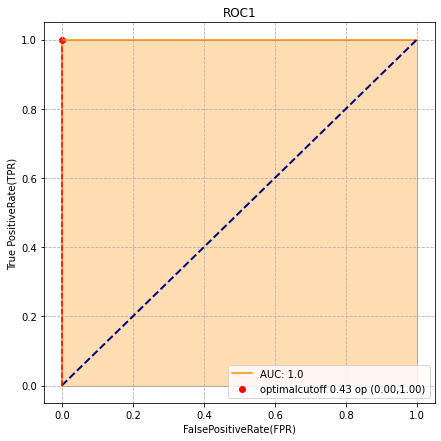

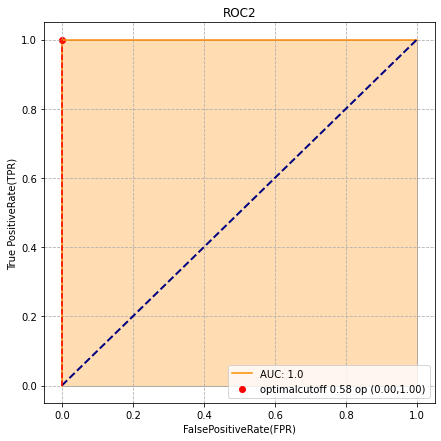

In [2]:
"""
Excercise 4
Read the data from the file “simpsons_roc1”.
a.  User the plot_roc function(see slides) to draw the ROC-curve.
b.  What is the best treshold-value?
c.  What is de AUC? What does it mean?
d.  Apply the found treshold-value(see b.) to the y_score column(this
    column contains the results of a neural network predict_proba-function
    -see later-) to create a new predicted column.
e.  Perform steps a. to d. with the dataset in the file “simpsons_roc2”. Do
you notice any differences?
"""
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def show_confusion_table(confusion_matrix, labels):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(confusion_matrix, cmap=plt.cm.Oranges, alpha=0.3)
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            ax.text(
                x=j, y=i, s=confusion_matrix[i, j], va='center', ha='center', size='xx-large')
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    ax.set_xticks(range(0, len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticks(range(0, len(labels)))
    ax.set_yticklabels(labels)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()


def plot_roc(y_true, y_score, title='ROC Curve', **kwargs):
    from sklearn.metrics import roc_curve, roc_auc_score
    if'pos_label' in kwargs:
        fpr, tpr, thresholds = roc_curve(
            y_true=y_true, y_score=y_score, pos_label=kwargs.get('pos_label'))
        auc = roc_auc_score(y_true, y_score)
    else:
        fpr, tpr, thresholds = roc_curve(y_true=y_true, y_score=y_score)
        auc = roc_auc_score(y_true, y_score)

    # calculate optimal cut-off with Youden index method
    optimal_idx = np.argmax(tpr-fpr)
    optimal_threshold = thresholds[optimal_idx]

    figsize = kwargs.get('figsize', (7, 7))
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    ax.grid(linestyle='--')

    # plot ROC curve
    ax.plot(fpr, tpr, color='darkorange', label='AUC: {}'.format(auc))
    ax.set_title(title)
    ax.set_xlabel('FalsePositiveRate(FPR)')
    ax.set_ylabel('True PositiveRate(TPR)')
    ax.fill_between(fpr, tpr, alpha=0.3, color='darkorange', edgecolor='black')

    # plot classifier
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

    # plot optimal cut-off
    ax.scatter(fpr[optimal_idx], tpr[optimal_idx], label='optimalcutoff {:.2f} op ({:.2f},{:.2f})'.format(
        optimal_threshold, fpr[optimal_idx], tpr[optimal_idx]), color='red')
    ax.plot([fpr[optimal_idx], fpr[optimal_idx]], [
            0, tpr[optimal_idx]], linestyle='--', color='red')
    ax.plot([0, fpr[optimal_idx]], [tpr[optimal_idx],
            tpr[optimal_idx]], linestyle='--', color='red')
    ax.legend(loc='lower right')

    plt.show()

roc1 = pd.read_csv("simpsons_roc1.csv", delimiter=",", decimal=".")
roc2 = pd.read_csv("simpsons_roc2.csv", delimiter=",", decimal=".")

roc1x = roc1[['y_true']]
roc1y = roc1[['y_score']]
# model = LinearDiscriminantAnalysis()
# model.fit(roc1x, roc1y)

plot_roc(roc1x, roc1y, "ROC1")

roc2x = roc2[['y_true']]
roc2y = roc2[['y_score']]
# model = LinearDiscriminantAnalysis()
# model.fit(roc2x, roc2y)

# AUC = measurement of quality

plot_roc(roc2x, roc2y, "ROC2")
